In [1]:
import pandas as pd 
import numpy as np 

In [2]:
### Load in the data 
df = pd.read_csv("aggregated.csv")

In [69]:
## quick view of the data 
df.head()

,MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,Unnamed: 13
0,2.0,6.0,2017-02-25,B6,28.0,MCO,"Orlando, FL",EWR,"Newark, NJ",1000.0,0.0,156.0,937.0,NaN
1,2.0,7.0,2017-02-26,B6,28.0,MCO,"Orlando, FL",EWR,"Newark, NJ",739.0,0.0,153.0,937.0,NaN
2,2.0,1.0,2017-02-27,B6,28.0,MCO,"Orlando, FL",EWR,"Newark, NJ",1028.0,0.0,158.0,937.0,NaN
3,2.0,2.0,2017-02-28,B6,28.0,MCO,"Orlando, FL",EWR,"Newark, NJ",739.0,0.0,153.0,937.0,NaN
4,2.0,3.0,2017-02-01,B6,33.0,BTV,"Burlington, VT",JFK,"New York, NY",1907.0,0.0,90.0,266.0,NaN


In [70]:
## Before encoding or classifying anything, lets first look for null values 
df.isna().sum()

MONTH                     0
DAY_OF_WEEK               0
FL_DATE                   0
UNIQUE_CARRIER            0
FL_NUM                    0
ORIGIN                    0
ORIGIN_CITY_NAME          0
DEST                      0
DEST_CITY_NAME            0
CRS_DEP_TIME              0
ARR_DEL15             71020
CRS_ELAPSED_TIME         10
DISTANCE                  0
Unnamed: 13         5129354
dtype: int64

### Destination city name is equivalently labelled w/ the Dest column so we can just one of these features 
### Same for origin city 
### Note for day of week --> 1=Monday ... 7  =Sunday
### Unnamed: 13 is always null and therefore should be dropped 

In [4]:
def drop_values(df):
    df = df.drop(columns=["ORIGIN_CITY_NAME", "DEST_CITY_NAME"])
    df = df.drop(columns=['Unnamed: 13'])
    return df

In [73]:
df.head()

,MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2.0,6.0,2017-02-25,B6,28.0,MCO,EWR,1000.0,0.0,156.0,937.0
1,2.0,7.0,2017-02-26,B6,28.0,MCO,EWR,739.0,0.0,153.0,937.0
2,2.0,1.0,2017-02-27,B6,28.0,MCO,EWR,1028.0,0.0,158.0,937.0
3,2.0,2.0,2017-02-28,B6,28.0,MCO,EWR,739.0,0.0,153.0,937.0
4,2.0,3.0,2017-02-01,B6,33.0,BTV,JFK,1907.0,0.0,90.0,266.0


In [74]:
df.head(100)

,MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2.0,6.0,2017-02-25,B6,28.0,MCO,EWR,1000.0,0.0,156.0,937.0
1,2.0,7.0,2017-02-26,B6,28.0,MCO,EWR,739.0,0.0,153.0,937.0
2,2.0,1.0,2017-02-27,B6,28.0,MCO,EWR,1028.0,0.0,158.0,937.0
3,2.0,2.0,2017-02-28,B6,28.0,MCO,EWR,739.0,0.0,153.0,937.0
4,2.0,3.0,2017-02-01,B6,33.0,BTV,JFK,1907.0,0.0,90.0,266.0
...,...,...,...,...,...,...,...,...,...,...,...
95,2.0,5.0,2017-02-10,B6,43.0,RNO,LGB,1120.0,0.0,81.0,402.0
96,2.0,6.0,2017-02-11,B6,43.0,RNO,LGB,1120.0,0.0,81.0,402.0
97,2.0,7.0,2017-02-12,B6,43.0,RNO,LGB,1120.0,0.0,81.0,402.0
98,2.0,1.0,2017-02-13,B6,43.0,RNO,LGB,1120.0,0.0,81.0,402.0


In [9]:
## Lets explore the data starting with a scatter matrix 
from pandas.plotting import scatter_matrix

/Users/epociask/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/epociask/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/epociask/.pyenv/versions/3.6.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNu

array([[<AxesSubplot:xlabel='MONTH', ylabel='MONTH'>,
        <AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='MONTH'>,
        <AxesSubplot:xlabel='FL_NUM', ylabel='MONTH'>,
        <AxesSubplot:xlabel='CRS_DEP_TIME', ylabel='MONTH'>,
        <AxesSubplot:xlabel='ARR_DEL15', ylabel='MONTH'>,
        <AxesSubplot:xlabel='CRS_ELAPSED_TIME', ylabel='MONTH'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='MONTH'>],
       [<AxesSubplot:xlabel='MONTH', ylabel='DAY_OF_WEEK'>,
        <AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='DAY_OF_WEEK'>,
        <AxesSubplot:xlabel='FL_NUM', ylabel='DAY_OF_WEEK'>,
        <AxesSubplot:xlabel='CRS_DEP_TIME', ylabel='DAY_OF_WEEK'>,
        <AxesSubplot:xlabel='ARR_DEL15', ylabel='DAY_OF_WEEK'>,
        <AxesSubplot:xlabel='CRS_ELAPSED_TIME', ylabel='DAY_OF_WEEK'>,
        <AxesSubplot:xlabel='DISTANCE', ylabel='DAY_OF_WEEK'>],
       [<AxesSubplot:xlabel='MONTH', ylabel='FL_NUM'>,
        <AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='FL_NUM'>,
        <AxesSubplot

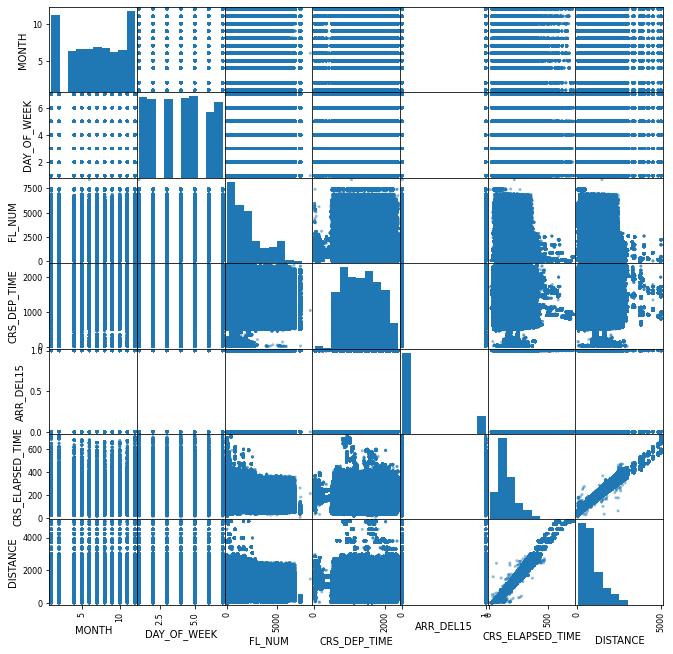

In [10]:
%matplotlib inline
scatter_matrix(df, figsize=(11,11))

### From this scatter plot analysis, we see the only values that are linearly coordinated appear to be ELAPSED_TIME x DISTANCE... intuitively this makes perfect sense as the distance a plane has to travel increases, the amount of time it takes to reach destination should increase as well
### ARR_DEL15 appears to not be conditionally based upon any one of the other individual features.. maybe a model that doesn't assume linear relationships would work well

In [75]:
### Flight number appears very crpytic and should also be dropped 

df = df.drop(columns=['FL_NUM'])

In [5]:
## Label encoding the categorical entries 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


def encode_cats(df: pd.DataFrame)->pd.DataFrame:
    df["ORIGIN"] = le.fit_transform(df["ORIGIN"])
    df["DEST"] = le.fit_transform(df["DEST"])
    df['UNIQUE_CARRIER'] = le.fit_transform(df['UNIQUE_CARRIER'])
    return(df)


In [79]:
df.head()

,MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2.0,6.0,2017-02-25,2,188,98,1000.0,0.0,156.0,937.0
1,2.0,7.0,2017-02-26,2,188,98,739.0,0.0,153.0,937.0
2,2.0,1.0,2017-02-27,2,188,98,1028.0,0.0,158.0,937.0
3,2.0,2.0,2017-02-28,2,188,98,739.0,0.0,153.0,937.0
4,2.0,3.0,2017-02-01,2,48,158,1907.0,0.0,90.0,266.0


In [3]:
### Let's export this dataframe and go establish a baseline to work with 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
def split_train_predict(df: pd.DataFrame) -> float:
    X = df.drop(columns=['ARR_DEL15'])
    Y = df['ARR_DEL15']
    train_x, test_x, train_y, test_y = train_test_split(X, Y)
    rf = RandomForestClassifier()
    rf.fit(train_x, train_y)
    hyp = rf.predict(test_x)
    return accuracy_score(hyp, test_y) 

In [56]:
print(accuracy_score(hyp, test_y))

0.7758156041828775


### Lovely, so 77% is now our baseline, let's perform some augmentations step-by-step and see if we can improve this baseline accuracy

In [7]:
from math import sin
def osc_transform(df: pd.DataFrame) -> pd.DataFrame:
    df['MONTH'] = [sin(e) for e in df['MONTH']]
    df['DAY_OF_WEEK'] = [sin(e) for e in df['DAY_OF_WEEK']]
    return df

In [60]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
hyp = rf.predict(test_x)
print(accuracy_score(hyp, test_y))

0.7762568560095652


### Minor improvement 

In [8]:
### https://getawaytips.azcentral.com/busiest-time-air-travel-3409.html
def isBusyTime(date: str):
    if "11-22" in date or "11-23" in date: ## Thanksgiving && Thanksgiving eve 
        return 1
    if "12-24" in date or "12-25" in date or "12-26" in date or "12-27" in date: ## End of christas 
        return 1 
    if "12-28" in date or "12-29" in date or "12-30" in date or "12-31" in date or "01-01" in date: ## To New Year's day 
        return 1 
    return 0 

In [174]:
df = encode_cats(df)
df = drop_values(df)
df = osc_transform(df)

In [169]:
df["BUSY_TIME"] = [isBusyTime(e) for e in df["FL_DATE"]]
df = df.drop(columns=["FL_DATE"])

In [181]:
df.head()

,MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,BUSY_TIME
0,0.909297,-0.279415,2,28.0,188,98,1000.0,0.0,156.0,937.0,0
1,0.909297,0.656987,2,28.0,188,98,739.0,0.0,153.0,937.0,0
2,0.909297,0.841471,2,28.0,188,98,1028.0,0.0,158.0,937.0,0
3,0.909297,0.909297,2,28.0,188,98,739.0,0.0,153.0,937.0,0
4,0.909297,0.141120,2,33.0,48,158,1907.0,0.0,90.0,266.0,0


In [182]:
acc = split_train_predict(df)

In [184]:
print(acc)

0.7774224567130377


### Another minor improvement, denoting that specific days of year have higher impact upon the likelihood of a delay, lets now add an adjustment for fridays during summer months

In [9]:
def isBusyTime(date: str, month: int, day_of_week: int) -> int:
    if month in [6,7,8] and day_of_week == 5:
        return 1 
    if "2016-11-22" in date or "11-23" in date or "2017-11-24" in date: ## Thanksgiving && Thanksgiving eve 
        return 1
    if "12-24" in date or "12-25" in date or "12-26" in date or "12-27" in date: ## End of christas 
        return 1 
    if "12-28" in date or "12-29" in date or "12-30" in date or "12-31" in date or "01-01" in date: ## To New Year's day 
        return 1 
    return 0 

In [196]:
df = pd.read_csv("aggregated.csv")
df = encode_cats(df)
df = drop_values(df)


KeyboardInterrupt: 

In [197]:
df.head()

,MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2.0,6.0,2017-02-25,2,28.0,188,98,1000.0,0.0,156.0,937.0
1,2.0,7.0,2017-02-26,2,28.0,188,98,739.0,0.0,153.0,937.0
2,2.0,1.0,2017-02-27,2,28.0,188,98,1028.0,0.0,158.0,937.0
3,2.0,2.0,2017-02-28,2,28.0,188,98,739.0,0.0,153.0,937.0
4,2.0,3.0,2017-02-01,2,33.0,48,158,1907.0,0.0,90.0,266.0


In [10]:
busy = []
for index, val in enumerate(df["FL_DATE"]):
    busy.append(isBusyTime(val, df["MONTH"][index], df["DAY_OF_WEEK"][index]))

KeyboardInterrupt: 

In [ ]:
df["BUSY"] = busy
df = df.drop(columns=["FL_DATE"])

In [206]:
df = osc_transform(df)

In [207]:
df.head()

,MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,BUSY
0,0.909297,-0.279415,2,28.0,188,98,1000.0,0.0,156.0,937.0,0
1,0.909297,0.656987,2,28.0,188,98,739.0,0.0,153.0,937.0,0
2,0.909297,0.841471,2,28.0,188,98,1028.0,0.0,158.0,937.0,0
3,0.909297,0.909297,2,28.0,188,98,739.0,0.0,153.0,937.0,0
4,0.909297,0.141120,2,33.0,48,158,1907.0,0.0,90.0,266.0,0


In [209]:
proc_df = df.dropna()

In [211]:
acc = split_train_predict(proc_df)

In [212]:
print(acc)

0.7775861469068088


In [11]:
def holiday_transform(df: pd.DataFrame) -> pd.DataFrame:
    busy = []
    for index, val in enumerate(df["FL_DATE"]):
        busy.append(isBusyTime(val, df["MONTH"][index], df["DAY_OF_WEEK"][index]))
        
    df["BUSY"] = [e for e in busy]
    return df

In [215]:
df = pd.read_csv("aggregated.csv")

In [222]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
iter_1 = df.copy(deep=True)
iter_1 = encode_cats(iter_1)
iter_1 = drop_values(iter_1)
iter_1 = holiday_transform(iter_1)
iter_1 = osc_transform(iter_1)

In [350]:
iter_1 = iter_1.dropna()
iter_1 = iter_1.sample(n=50000)

In [351]:
 Y = iter_1["ARR_DEL15"]
iter_1 = iter_1.drop(columns=["ARR_DEL15"])
iter_1 = iter_1.drop(columns=["FL_DATE"])


In [352]:
iter_1["DELAY"] = Y

In [331]:
data_rescaled = scaler.fit_transform(iter_1)

In [332]:
scaled = pd.DataFrame(data_rescaled)

In [356]:
iter_1 = iter_1.sample(n=20000)

In [245]:
for i in range(1, 11):
    pca = PCA(n_components=i).fit(scaled)
    print(f"{i} -> {sum(pca.explained_variance_ratio_)}")

1 -> 0.20141811640197624
2 -> 0.38936214095426214
3 -> 0.5743774804173252
4 -> 0.6766378853811049
5 -> 0.7758790597286033
6 -> 0.8585573317178196
7 -> 0.9151156823172156
8 -> 0.9711391549363647
9 -> 0.999748916081535
10 -> 1.0000000000000002


In [335]:
sample_df = (pd.DataFrame(PCA(n_components=8).fit_transform(scaled)))
sample_df["ARR_DEL15"] = [e for e in Y]

In [347]:
sample_df

,0,1,2,3,4,5,6,7,ARR_DEL15
0,-0.175385,0.341241,-0.253915,-0.343593,0.156114,-0.547187,0.048459,0.464113,0.0
1,0.776292,0.466273,-0.313411,0.382324,-0.463810,-0.162902,-0.126952,0.038578,1.0
2,-0.230536,0.406661,-0.650244,-0.126840,-0.358844,0.056584,0.022053,-0.045503,0.0
3,0.085261,-0.118650,-0.609667,-0.032519,-0.007418,0.239374,-0.106227,0.132062,0.0
4,0.069552,-0.702239,0.447357,-0.013983,-0.043857,-0.052735,-0.224975,-0.376220,0.0
...,...,...,...,...,...,...,...,...,...
19995,-0.307257,-0.029843,0.318647,-0.023534,-0.158997,-0.367360,0.995975,-0.294377,0.0
19996,0.028176,-0.584886,0.390156,-0.071920,0.136144,0.231979,-0.202580,-0.344296,0.0
19997,-0.161359,-0.418255,0.520285,-0.121598,0.106775,-0.515745,-0.084190,0.121125,0.0
19998,0.108837,-0.072753,0.069995,-0.518508,-0.359534,-0.124993,-0.137893,-0.179748,0.0


In [359]:
### Hyper parameter tuning baby 
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as ac

best_score = -199
best_depth = best_state = best_estimator = best_boot = best_min_sample = None 
max_depths = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
for depth in max_depths:
            for min_samples_split_val in [2, 5, 10]:
                for estimator in [200, 400, 600, 800, 2000]:
                    for min_sample_leaf in [1, 2, 4]:
                        clf = RandomForestClassifier(
                                max_depth=depth, 
                                min_samples_split=min_samples_split_val,
                                min_samples_leaf=min_sample_leaf, 
                                n_estimators=estimator
                            )
                        score = split_train_predict(iter_1, clf)
                        if score > best_score:
                            best_score = score 
                            best_min_sample = min_sample_leaf
                            best_boot = bootstrap_val
                            best_min_sample_split = min_samples_split_val
                            beest_depth = depth 
                            best_estimator = estimator

                        print(f"max_depth --> {depth}, n_estimator -->{estimator}, bootstrap --> {bootstrap_val} min_sample_leaf ----> {min_sample_leaf} split value ---> {min_samples_split_val} score --> {score}")


max_depth --> 10, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 1 split value ---> 2 score --> 0.816
max_depth --> 10, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 2 split value ---> 2 score --> 0.8122
max_depth --> 10, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 4 split value ---> 2 score --> 0.8148
max_depth --> 10, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 1 split value ---> 2 score --> 0.8196
max_depth --> 10, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 2 split value ---> 2 score --> 0.8158
max_depth --> 10, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 4 split value ---> 2 score --> 0.8148
max_depth --> 10, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 1 split value ---> 2 score --> 0.8192
max_depth --> 10, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 2 split value ---> 2 score --> 0.8192
max_depth --> 10, n_estimator -->600, bootstrap --> True min_samp

max_depth --> 20, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 2 split value ---> 5 score --> 0.8162
max_depth --> 20, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 4 split value ---> 5 score --> 0.822
max_depth --> 20, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 1 split value ---> 5 score --> 0.8158
max_depth --> 20, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 2 split value ---> 5 score --> 0.822
max_depth --> 20, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 4 split value ---> 5 score --> 0.8258
max_depth --> 20, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 1 split value ---> 10 score --> 0.8232
max_depth --> 20, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 2 split value ---> 10 score --> 0.8148
max_depth --> 20, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 4 split value ---> 10 score --> 0.8232
max_depth --> 20, n_estimator -->400, bootstrap --> True min

max_depth --> 40, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 4 split value ---> 2 score --> 0.8192
max_depth --> 40, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 1 split value ---> 2 score --> 0.8154
max_depth --> 40, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 2 split value ---> 2 score --> 0.8222
max_depth --> 40, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 4 split value ---> 2 score --> 0.8202
max_depth --> 40, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 1 split value ---> 2 score --> 0.8096
max_depth --> 40, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 2 split value ---> 2 score --> 0.8168
max_depth --> 40, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 4 split value ---> 2 score --> 0.8166
max_depth --> 40, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 1 split value ---> 2 score --> 0.8174
max_depth --> 40, n_estimator -->2000, bootstrap --> True min_s

max_depth --> 50, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 1 split value ---> 10 score --> 0.8206
max_depth --> 50, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 2 split value ---> 10 score --> 0.8196
max_depth --> 50, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 4 split value ---> 10 score --> 0.812
max_depth --> 50, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 1 split value ---> 10 score --> 0.82
max_depth --> 50, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 2 split value ---> 10 score --> 0.8202
max_depth --> 50, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 4 split value ---> 10 score --> 0.8196
max_depth --> 50, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 1 split value ---> 10 score --> 0.8178
max_depth --> 50, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 2 split value ---> 10 score --> 0.7986
max_depth --> 50, n_estimator -->600, bootstrap --> True mi

max_depth --> 70, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 2 split value ---> 2 score --> 0.8202
max_depth --> 70, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 4 split value ---> 2 score --> 0.8224
max_depth --> 70, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 1 split value ---> 2 score --> 0.8014
max_depth --> 70, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 2 split value ---> 2 score --> 0.8088
max_depth --> 70, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 4 split value ---> 2 score --> 0.8226
max_depth --> 70, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 1 split value ---> 5 score --> 0.8162
max_depth --> 70, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 2 split value ---> 5 score --> 0.8162
max_depth --> 70, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 4 split value ---> 5 score --> 0.8174
max_depth --> 70, n_estimator -->400, bootstrap --> True min_

max_depth --> 80, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 4 split value ---> 10 score --> 0.8232
max_depth --> 80, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 1 split value ---> 10 score --> 0.8106
max_depth --> 80, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 2 split value ---> 10 score --> 0.8236
max_depth --> 80, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 4 split value ---> 10 score --> 0.8188
max_depth --> 80, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 1 split value ---> 10 score --> 0.814
max_depth --> 80, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 2 split value ---> 10 score --> 0.8114
max_depth --> 80, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 4 split value ---> 10 score --> 0.8168
max_depth --> 80, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 1 split value ---> 10 score --> 0.8218
max_depth --> 80, n_estimator -->2000, bootstrap --> Tru

max_depth --> 100, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 1 split value ---> 5 score --> 0.8182
max_depth --> 100, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 2 split value ---> 5 score --> 0.8184
max_depth --> 100, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 4 split value ---> 5 score --> 0.8108
max_depth --> 100, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 1 split value ---> 5 score --> 0.8062
max_depth --> 100, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 2 split value ---> 5 score --> 0.816
max_depth --> 100, n_estimator -->400, bootstrap --> True min_sample_leaf ----> 4 split value ---> 5 score --> 0.8216
max_depth --> 100, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 1 split value ---> 5 score --> 0.8132
max_depth --> 100, n_estimator -->600, bootstrap --> True min_sample_leaf ----> 2 split value ---> 5 score --> 0.8122
max_depth --> 100, n_estimator -->600, bootstrap --> True

max_depth --> None, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 1 split value ---> 10 score --> 0.8164
max_depth --> None, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 2 split value ---> 10 score --> 0.819
max_depth --> None, n_estimator -->800, bootstrap --> True min_sample_leaf ----> 4 split value ---> 10 score --> 0.8188
max_depth --> None, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 1 split value ---> 10 score --> 0.8224
max_depth --> None, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 2 split value ---> 10 score --> 0.8168
max_depth --> None, n_estimator -->2000, bootstrap --> True min_sample_leaf ----> 4 split value ---> 10 score --> 0.8206


In [4]:
## max_depth --> 50, n_estimator -->200, bootstrap --> True min_sample_leaf ----> 4 split value ---> 5 
clf = RandomForestClassifier(
                                max_depth=50, 
                                min_samples_split=5,
                                min_samples_leaf=4, 
                                n_estimators=200
                            )
    
score = split_train_predict(iter_1, clf)

NameError: name 'split_train_predict' is not defined